In [12]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

import time
import sys
import gc

In [2]:
keys = ['pid', 'product', 'model', 'brand', 'maker', 'img_feat', 'price', 'updttm', 'bcateid', 'mcateid', 'scateid', 'dcateid']
# split data set
#  100*10 = 1000개씩 val 용으로 뺌
chunk_size = 99900
#         num_pre = num_pre+chunk_size
for i in tqdm(range(10)):
    # 만들 데이터
    hf = h5py.File('./tmp/data_0%d.h5'%(i), 'w')
    hf_train = hf.create_group('train')

    for k in tqdm(keys):
        path_x = './data_org/train.chunk.0%d'%(1)
        hf_org = h5py.File(path_x, 'r')
        num_pre = 0

        if k=='img_feat': hf_train.create_dataset(k, data=hf_org['train'][k][:chunk_size], chunks=(chunk_size,2048), maxshape=(None,2048))
        else: hf_train.create_dataset(k, data=hf_org['train'][k][:chunk_size], chunks=(chunk_size,), maxshape=(None,)) 

        for no in range(2,9): # 2 to 8
            path_x = './data_org/train.chunk.0%d'%(no)
            hf_tmp = h5py.File(path_x, 'r')

            val_len = hf_train[k].shape[0]
            hf_train[k].resize(val_len+chunk_size, axis=0)
            hf_train[k][-1*chunk_size:] = hf_tmp['train'][k][i*chunk_size:(i+1)*chunk_size]
            hf_tmp.close()
#             print(k, hf_train[k].shape[0], num_pre,'=====================================')
        '''
        for chunk 9
        chunk9 size = 134818 --> 134500/10 = 13450 // 318개는 val set으로
        '''
        chunk_size9 = 13450
        hf_tmp = h5py.File('./data_org/train.chunk.0%d'%(9), 'r')
        val_len = hf_train[k].shape[0]
        hf_train[k].resize(val_len+chunk_size9, axis=0)
        hf_train[k][-1*chunk_size9:] = hf_tmp['train'][k][i*chunk_size9:(i+1)*chunk_size9]
        hf_tmp.close()
        
    print('%d chunk completed: size %d'%(i, hf_train[k].shape[0]))
    hf.close()

A Jupyter Widget

A Jupyter Widget

0 chunk completed: size 812650


A Jupyter Widget

1 chunk completed: size 812650


A Jupyter Widget

2 chunk completed: size 812650


A Jupyter Widget

3 chunk completed: size 812650


A Jupyter Widget

4 chunk completed: size 812650


A Jupyter Widget

5 chunk completed: size 812650


A Jupyter Widget

6 chunk completed: size 812650


A Jupyter Widget

7 chunk completed: size 812650


A Jupyter Widget

8 chunk completed: size 812650


A Jupyter Widget

9 chunk completed: size 812650



In [3]:
chunk_size = 1000
# val 만들 데이터
hf = h5py.File('./tmp/data_val.h5', 'w')
hf_train = hf.create_group('val')

for k in tqdm(keys):
    path_x = './data_org/train.chunk.0%d'%(1)
    hf_org = h5py.File(path_x, 'r')
    num_pre = 0

    if k=='img_feat': hf_train.create_dataset(k, data=hf_org['train'][k][-1*chunk_size:], chunks=(chunk_size,2048), maxshape=(None,2048))
    else: hf_train.create_dataset(k, data=hf_org['train'][k][-1*chunk_size:], chunks=(chunk_size,), maxshape=(None,)) 

    for no in range(2,9): # 2 to 8
        path_x = './data_org/train.chunk.0%d'%(no)
        hf_tmp = h5py.File(path_x, 'r')

        val_len = hf_train[k].shape[0]
        hf_train[k].resize(val_len+chunk_size, axis=0)
        hf_train[k][-1*chunk_size:] = hf_tmp['train'][k][-1*chunk_size:]
        hf_tmp.close()
#             print(k, hf_train[k].shape[0], num_pre,'=====================================')
    '''
    for chunk 9
    chunk9 size = 134818 --> 134500/10 = 13450 // 318개는 val set으로
    '''
    chunk_size9 = 318
    hf_tmp = h5py.File('./data_org/train.chunk.0%d'%(9), 'r')
    val_len = hf_train[k].shape[0]
    hf_train[k].resize(val_len+chunk_size9, axis=0)
    hf_train[k][-1*chunk_size9:] = hf_tmp['train'][k][-1*chunk_size9:]
    hf_tmp.close()

print('val chunk completed: size %d'%(hf_train[k].shape[0]))
hf.close()

A Jupyter Widget


val chunk completed: size 8318


In [4]:
import _pickle
y_vocab = _pickle.load(open('./data_org/y_vocab.py3.cPickle', 'rb'))

# y-label to token
def cate2token(path, y_vocab):
    # cate to token
    data_y=[]
    for cate in tqdm(zip(df['bcateid'],df['mcateid'],df['scateid'],df['dcateid'])):
        tmp = str(cate[0])+'>'+str(cate[1])+'>'+str(cate[2])+'>'+str(cate[3])
        data_y.append(y_vocab[tmp])

    # save data_y
    np.savetxt(path, data_y, delimiter=',')
    return np.array(data_y)

In [5]:
for i in tqdm(range(0,10)):
    hf = h5py.File('./tmp/data_0%d.h5'%(i), 'r')
    df = hf['train']
    tmp_path_y = 'tmp/data_y_0%d.csv' %(i)
    cate2token(tmp_path_y, y_vocab)
    hf.close()

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [11]:
hf = h5py.File('./tmp/data_val.h5', 'r')
df = hf['val']
tmp_path_y = 'tmp/data_y_val2.csv'
cate2token(tmp_path_y, y_vocab)
hf.close()

A Jupyter Widget

---
# data

In [13]:
import _pickle
y_vocab = _pickle.load(open('./data_org/y_vocab.py3.cPickle', 'rb'))
y_vocab['43>109>1576>-1']
print(len(y_vocab))

token_to_cate = {}
for it in y_vocab.items():
     token_to_cate[it[1]] = it[0]

4215


In [ ]:
%%time
hf = h5py.File('./tmp/data_val.h5', 'r')
df = hf['val']

# cate to token
data_y=[]
for cate in tqdm(zip(df['bcateid'],df['mcateid'],df['scateid'],df['dcateid'])):
    tmp = str(cate[0])+'>'+str(cate[1])+'>'+str(cate[2])+'>'+str(cate[3])
    data_y.append(y_vocab[tmp])

# y-label to one-hot encoding
output_dim = len(y_vocab) # 4215개
y_tmp = np.zeros([len(data_y), output_dim])
y_tmp[np.arange(len(data_y)), data_y] = 1
data_y = y_tmp

print(data_y.shape)

A Jupyter Widget

In [28]:
cols = ['product', 'model', 'brand', 'maker']
data = {
    c: hf['val'][c] for c in cols
}
df = pd.DataFrame(data)

for i in ['product', 'model', 'brand', 'maker']:
    df[i] = df[i].apply(lambda x: x.decode('utf8'))
    
data_x = []
for i in tqdm(list(zip(df['product'], df['brand'], df['maker'], df['model']))):
    sentence = ' '.join(i)
    sentence = list(sentence)
    data_x.append(sentence)

A Jupyter Widget

In [30]:
li = [len(i) for i in data_x]
print( np.mean(li), np.max(li), np.min(li))

60.84419331570089 290 7


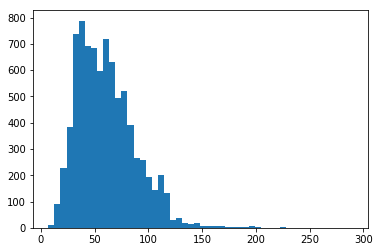

In [31]:
plt.hist(li, bins=50)
plt.show()

In [35]:
from collections import Counter

In [44]:
dd = Counter([x for y in data_x for x in y])

In [47]:
len(dd)

1482

---
## 캐릭터 사전

In [69]:
def make_df(chunk_no):
    path_x = './data_org/train.chunk.0%d'%(chunk_no)
    h = h5py.File(path_x, 'r')

    mode = 'train'
    cols = ['product', 'model', 'brand', 'maker']
    data = {
        c: h[mode][c] for c in cols
    }
    df = pd.DataFrame(data)

    for i in ['product', 'model', 'brand', 'maker']:
        df[i] = df[i].apply(lambda x: x.decode('utf8'))
    
    h.close()
    return df

In [52]:
%%time
df = make_df(0)

Wall time: 3.47 s


In [70]:
voc = Counter()

In [72]:
for i in tqdm(range(1,10)):
    df = make_df(i)
    for k in ['product', 'model', 'brand', 'maker']:
        voc.update(Counter(list(' '.join(list(df[k])))))


A Jupyter Widget

In [80]:
vocab = sorted(voc.items(), key=lambda x: x[1], reverse=True)

In [97]:
vocab[-1890:]

[('솎', 10),
 ('ぴ', 10),
 ('㎌', 10),
 ('私', 10),
 ('皿', 10),
 ('郵', 10),
 ('젱', 10),
 ('非', 10),
 ('尺', 10),
 ('値', 10),
 ('砂', 10),
 ('杏', 10),
 ('筋', 10),
 ('學', 10),
 ('龍', 10),
 ('菓', 10),
 ('貴', 10),
 ('ｙ', 10),
 ('酵', 10),
 ('鼻', 10),
 ('盆', 10),
 ('但', 10),
 ('촤', 9),
 ('㎚', 9),
 ('ⓦ', 9),
 ('맣', 9),
 ('졀', 9),
 ('殿', 9),
 ('읗', 9),
 ('湯', 9),
 ('냘', 9),
 ('兵', 9),
 ('н', 9),
 ('т', 9),
 ('в', 9),
 ('х', 9),
 ('뱐', 9),
 ('管', 9),
 ('守', 9),
 ('南', 9),
 ('ｇ', 9),
 ('к', 9),
 ('制', 9),
 ('技', 9),
 ('興', 9),
 ('養', 9),
 ('希', 9),
 ('竺', 9),
 ('各', 9),
 ('强', 9),
 ('胡', 9),
 ('朝', 9),
 ('來', 9),
 ('近', 9),
 ('宅', 9),
 ('舟', 9),
 ('떽', 9),
 ('枕', 9),
 ('濱', 9),
 ('干', 9),
 ('斗', 9),
 ('긷', 9),
 ('勝', 9),
 ('♤', 9),
 ('껫', 9),
 ('玄', 9),
 ('Ｗ', 9),
 ('住', 9),
 ('宴', 9),
 ('竿', 9),
 ('訓', 9),
 ('伽', 9),
 ('擲', 9),
 ('뼉', 9),
 ('깰', 9),
 ('鹿', 9),
 ('筒', 9),
 ('羅', 9),
 ('坪', 9),
 ('決', 8),
 ('㎥', 8),
 ('末', 8),
 ('눙', 8),
 ('△', 8),
 ('ː', 8),
 ('섄', 8),
 ('杯', 8),
 ('般', 8),
 ('佛', 8),

In [196]:
print(len(list(filter(lambda x: x[1]>10, vocab))), len(vocab))

2975 4891


In [213]:
vocab[2999:3001]

[('룃', 10), ('昇', 10)]

In [210]:
pd.DataFrame(vocab, columns=['char','cnt']).to_csv('data_org/char.csv', index=False)

In [104]:
#  3000개 = 2999 + unk
vocab_dict = {
    e[0]:i  for i,e in enumerate(vocab[:2999])
}
vocab_dict['<UNK>'] = 2999

In [105]:
vocab_dict

{' ': 0,
 '0': 1,
 '/': 2,
 '스': 3,
 '1': 4,
 'e': 5,
 '이': 6,
 'a': 7,
 '기': 8,
 '2': 9,
 'o': 10,
 '(': 11,
 ')': 12,
 'i': 13,
 '타': 14,
 'r': 15,
 '[': 16,
 ']': 17,
 'S': 18,
 'l': 19,
 '5': 20,
 '트': 21,
 'n': 22,
 't': 23,
 '3': 24,
 '리': 25,
 'A': 26,
 's': 27,
 '-': 28,
 'C': 29,
 '4': 30,
 '상': 31,
 'm': 32,
 '세': 33,
 'M': 34,
 'B': 35,
 'P': 36,
 '인': 37,
 '7': 38,
 '아': 39,
 '6': 40,
 'L': 41,
 '8': 42,
 'c': 43,
 'T': 44,
 '드': 45,
 'E': 46,
 '라': 47,
 '크': 48,
 'D': 49,
 '품': 50,
 '조': 51,
 'O': 52,
 '지': 53,
 'R': 54,
 '9': 55,
 'N': 56,
 'u': 57,
 'd': 58,
 '터': 59,
 'G': 60,
 'H': 61,
 'h': 62,
 'K': 63,
 'g': 64,
 '프': 65,
 'I': 66,
 '용': 67,
 '파': 68,
 '시': 69,
 '자': 70,
 'F': 71,
 '참': 72,
 '명': 73,
 '가': 74,
 '로': 75,
 'W': 76,
 'p': 77,
 '성': 78,
 '어': 79,
 '보': 80,
 '레': 81,
 '구': 82,
 '사': 83,
 '화': 84,
 '설': 85,
 '바': 86,
 '해': 87,
 '디': 88,
 '니': 89,
 '티': 90,
 '_': 91,
 '대': 92,
 '마': 93,
 '미': 94,
 'k': 95,
 '비': 96,
 '코': 97,
 '블': 98,
 '외': 99,
 '.': 100,

In [111]:
vocab_dict['<UNK>']

2999

In [187]:
sentence='형태소는 언어학에서 일정한 의미가 있는 가장 작은 말의 단위로 발화체 내에서 따로 떼어낼 수 있는 것을 말합니다. 즉, 더 분석하면 뜻이 없어지는 말의 단위입니다. 형태소분석기는 단어를 보고 형태소 단위로 분리해내는 소프트웨어를 말합니다. 이러한 형태소분석은 자연어 처리의 가장 기초적인 절차로 이후 구문 분석이나 의미 분석으로 나아가기 위해 가장 먼저 이루어져야 하는 과정으로 볼 수 있습니다. (한국어 위키피디아에서 인용)'

In [188]:
%%time
# sentence = "plt.plot(x_range, val_accuracies,'-g', label='Validation'꼬ㅑ재)"
# [vocab_dict[k] for k in sentence]
res = []
for k in sentence:
    try:
        res.append(vocab_dict[k])
    except:
        res.append(2999)
print(res)

[148, 333, 115, 371, 0, 377, 79, 308, 109, 206, 0, 114, 101, 169, 0, 190, 94, 74, 0, 690, 371, 0, 74, 117, 0, 312, 329, 0, 404, 190, 0, 200, 259, 75, 0, 211, 84, 194, 0, 235, 109, 206, 0, 704, 75, 0, 650, 79, 1735, 0, 102, 0, 690, 371, 0, 1035, 524, 0, 404, 501, 89, 112, 100, 0, 990, 138, 0, 164, 0, 321, 369, 140, 249, 0, 909, 6, 0, 226, 79, 53, 371, 0, 404, 190, 0, 200, 259, 209, 89, 112, 100, 0, 148, 333, 115, 321, 369, 8, 371, 0, 200, 79, 718, 0, 80, 129, 0, 148, 333, 115, 0, 200, 259, 75, 0, 321, 25, 87, 235, 371, 0, 115, 65, 21, 279, 79, 718, 0, 404, 501, 89, 112, 100, 0, 6, 128, 169, 0, 148, 333, 115, 321, 369, 329, 0, 70, 277, 79, 0, 486, 25, 190, 0, 74, 117, 0, 8, 357, 549, 37, 0, 398, 213, 75, 0, 6, 232, 0, 82, 197, 0, 321, 369, 6, 126, 0, 190, 94, 0, 321, 369, 675, 75, 0, 126, 39, 74, 8, 0, 259, 87, 0, 74, 117, 0, 460, 275, 0, 6, 143, 79, 566, 287, 0, 140, 371, 0, 331, 101, 675, 75, 0, 295, 0, 102, 0, 690, 534, 89, 112, 100, 0, 11, 169, 214, 79, 0, 259, 124, 135, 88, 39, 109,

In [189]:
%%time
# sentence = "plt.plot(x_range, val_accuracies,'-g', label='Validation'꼬ㅑ재)"
# [vocab_dict[k] for k in sentence]
res = []
for k in sentence:
    if k in vocab_dict.keys():
        res.append(vocab_dict[k])
    else:
        res.append(2999)
print(res)

[148, 333, 115, 371, 0, 377, 79, 308, 109, 206, 0, 114, 101, 169, 0, 190, 94, 74, 0, 690, 371, 0, 74, 117, 0, 312, 329, 0, 404, 190, 0, 200, 259, 75, 0, 211, 84, 194, 0, 235, 109, 206, 0, 704, 75, 0, 650, 79, 1735, 0, 102, 0, 690, 371, 0, 1035, 524, 0, 404, 501, 89, 112, 100, 0, 990, 138, 0, 164, 0, 321, 369, 140, 249, 0, 909, 6, 0, 226, 79, 53, 371, 0, 404, 190, 0, 200, 259, 209, 89, 112, 100, 0, 148, 333, 115, 321, 369, 8, 371, 0, 200, 79, 718, 0, 80, 129, 0, 148, 333, 115, 0, 200, 259, 75, 0, 321, 25, 87, 235, 371, 0, 115, 65, 21, 279, 79, 718, 0, 404, 501, 89, 112, 100, 0, 6, 128, 169, 0, 148, 333, 115, 321, 369, 329, 0, 70, 277, 79, 0, 486, 25, 190, 0, 74, 117, 0, 8, 357, 549, 37, 0, 398, 213, 75, 0, 6, 232, 0, 82, 197, 0, 321, 369, 6, 126, 0, 190, 94, 0, 321, 369, 675, 75, 0, 126, 39, 74, 8, 0, 259, 87, 0, 74, 117, 0, 460, 275, 0, 6, 143, 79, 566, 287, 0, 140, 371, 0, 331, 101, 675, 75, 0, 295, 0, 102, 0, 690, 534, 89, 112, 100, 0, 11, 169, 214, 79, 0, 259, 124, 135, 88, 39, 109,

In [190]:
%%time
# sentence = "plt.plot(x_range, val_accuracies,'-g', label='Validation'꼬ㅑ재)"
print([vocab_dict[k] if k in vocab_dict.keys() else 2999 for k in sentence])

[148, 333, 115, 371, 0, 377, 79, 308, 109, 206, 0, 114, 101, 169, 0, 190, 94, 74, 0, 690, 371, 0, 74, 117, 0, 312, 329, 0, 404, 190, 0, 200, 259, 75, 0, 211, 84, 194, 0, 235, 109, 206, 0, 704, 75, 0, 650, 79, 1735, 0, 102, 0, 690, 371, 0, 1035, 524, 0, 404, 501, 89, 112, 100, 0, 990, 138, 0, 164, 0, 321, 369, 140, 249, 0, 909, 6, 0, 226, 79, 53, 371, 0, 404, 190, 0, 200, 259, 209, 89, 112, 100, 0, 148, 333, 115, 321, 369, 8, 371, 0, 200, 79, 718, 0, 80, 129, 0, 148, 333, 115, 0, 200, 259, 75, 0, 321, 25, 87, 235, 371, 0, 115, 65, 21, 279, 79, 718, 0, 404, 501, 89, 112, 100, 0, 6, 128, 169, 0, 148, 333, 115, 321, 369, 329, 0, 70, 277, 79, 0, 486, 25, 190, 0, 74, 117, 0, 8, 357, 549, 37, 0, 398, 213, 75, 0, 6, 232, 0, 82, 197, 0, 321, 369, 6, 126, 0, 190, 94, 0, 321, 369, 675, 75, 0, 126, 39, 74, 8, 0, 259, 87, 0, 74, 117, 0, 460, 275, 0, 6, 143, 79, 566, 287, 0, 140, 371, 0, 331, 101, 675, 75, 0, 295, 0, 102, 0, 690, 534, 89, 112, 100, 0, 11, 169, 214, 79, 0, 259, 124, 135, 88, 39, 109,

In [205]:
vocab_dict.items()

dict_items([(' ', 0), ('0', 1), ('/', 2), ('스', 3), ('1', 4), ('e', 5), ('이', 6), ('a', 7), ('기', 8), ('2', 9), ('o', 10), ('(', 11), (')', 12), ('i', 13), ('타', 14), ('r', 15), ('[', 16), (']', 17), ('S', 18), ('l', 19), ('5', 20), ('트', 21), ('n', 22), ('t', 23), ('3', 24), ('리', 25), ('A', 26), ('s', 27), ('-', 28), ('C', 29), ('4', 30), ('상', 31), ('m', 32), ('세', 33), ('M', 34), ('B', 35), ('P', 36), ('인', 37), ('7', 38), ('아', 39), ('6', 40), ('L', 41), ('8', 42), ('c', 43), ('T', 44), ('드', 45), ('E', 46), ('라', 47), ('크', 48), ('D', 49), ('품', 50), ('조', 51), ('O', 52), ('지', 53), ('R', 54), ('9', 55), ('N', 56), ('u', 57), ('d', 58), ('터', 59), ('G', 60), ('H', 61), ('h', 62), ('K', 63), ('g', 64), ('프', 65), ('I', 66), ('용', 67), ('파', 68), ('시', 69), ('자', 70), ('F', 71), ('참', 72), ('명', 73), ('가', 74), ('로', 75), ('W', 76), ('p', 77), ('성', 78), ('어', 79), ('보', 80), ('레', 81), ('구', 82), ('사', 83), ('화', 84), ('설', 85), ('바', 86), ('해', 87), ('디', 88), ('니', 89), ('티', 90